##### 1) Plot of Surface Pressure on MPAS grid using Delauney Triangulation
- Read data from MPAS grid as xarray
- Read grid/cell info. as xarray 
- Global tripcolor plot of surface pressure

##### 2) Overlay 500hPa wind vector and zoom in

reference: https://gallery.pangeo.io/repos/NCAR/notebook-gallery/notebooks/Run-Anywhere/mpas/plot_of_surface_pressure_on_mpas_grid.html

In [6]:
import os
import sys
import time
import pickle as pkle

import numpy as np
import matplotlib.collections as mplcollections
import matplotlib.patches as patches
import matplotlib.path as path
from scipy.interpolate import griddata
%matplotlib inline
import xarray as xr
import numpy as np
import cartopy.feature as cfeature
import cartopy.crs as ccrs
import matplotlib.tri as tri
import matplotlib.pyplot as plt
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
#sys.path.append("/glade/work/mingge/MPAS-Analysis/notebook-gallery")

import cmaps as cm  # for NCL colormaps
from matplotlib.colors import LinearSegmentedColormap

#### read data from MPAS grid as xarray

In [7]:
flnm = '/gpfs/fs1/p/mmm/c3we/MPAS-Release-5.2/CLIM/2010/diag.2011-04-22_10.00.00.nc'
ds = xr.open_dataset(flnm)
ds = ds.squeeze()

# make sure what the pressure units is
ds["surface_pressure"] = ds["surface_pressure"] /100.
print(ds.surface_pressure.values[:10])

[1027.374    875.95905 1017.782   1021.15875 1020.171    659.6308
 1020.4529   979.0809   666.3491   892.54193]


#### read MPAS grid/cell info

In [8]:
flnm_ini = '/gpfs/fs1/p/mmm/c3we/MPAS-Release-5.2/CLIM/2010/x1.40962.init.nc'
ds_i = xr.open_dataset(flnm_ini)
ds_i = ds_i.squeeze()
# Convert to degrees from radians
ds_i["lonCell"] = np.degrees(ds_i.lonCell)
ds_i["latCell"] = np.degrees(ds_i.latCell)

In [9]:
# Global tripcolor plot
# Add cyclic point before computing the triangulation
ds_i["lonCell"] = ((ds_i["lonCell"] + 180) % 360) - 180
triang = tri.Triangulation(ds_i.lonCell, ds_i.latCell)

#### Global tripcolor plot

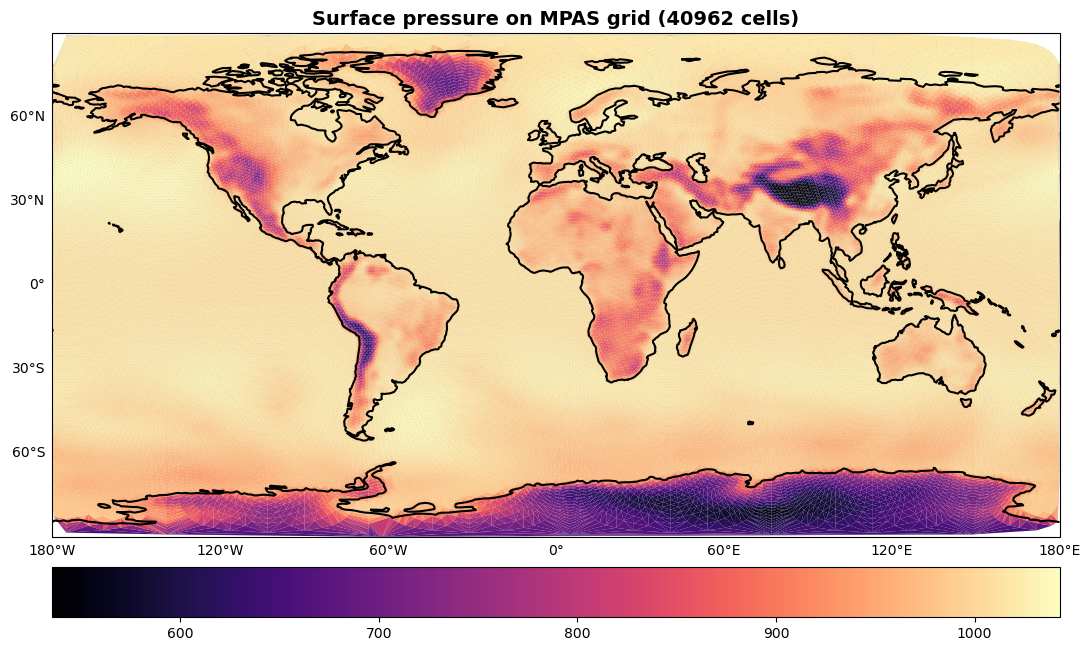

CPU times: user 5.91 s, sys: 68.8 ms, total: 5.98 s
Wall time: 6.22 s


In [17]:
%%time

fig = plt.figure(figsize=(13, 13))
ax = plt.subplot(111, projection=ccrs.PlateCarree())
mm = ax.tripcolor(triang,
                  ds.surface_pressure,
                  edgecolors='k',
                  lw=0.01,
                  alpha=1,
                  transform=ccrs.PlateCarree(),
                  cmap='magma')

ax.set_global()
ax.coastlines(lw=1.5, resolution='110m')
gl = ax.gridlines(draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = gl.ylabels_right = False
gl.xlines = gl.ylines = False
plt.colorbar(mm, orientation='horizontal', pad=0.03)
plt.title(f"Surface pressure on MPAS grid ({len(ds_i.lonCell)} cells)",
          fontweight="bold",fontsize=14)

plt.show()

#### 2) Overlay 500hPa wind vector and zoom in

In [22]:
u500 = ds['uzonal_500hPa']
v500= ds['umeridional_250hPa']

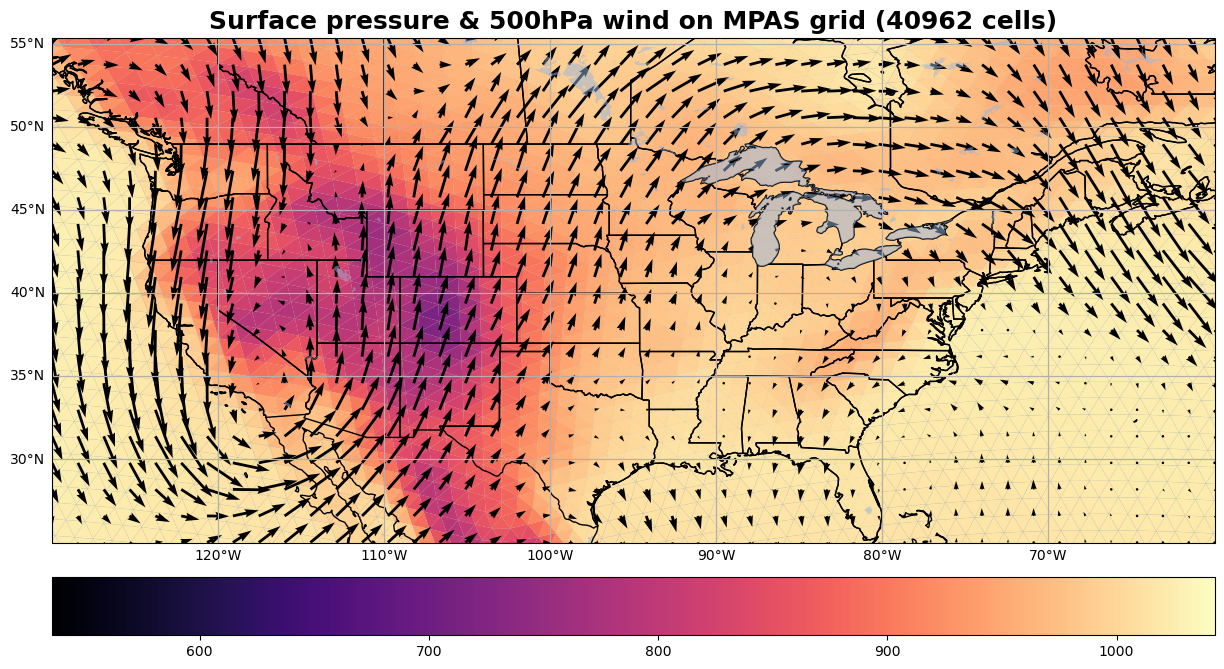

In [20]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())

#ax.set_global()
# Set lat/lon bounding box and feature resolutions.
ax.set_extent([-130, -60, 25, 50])

ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.STATES)
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.COASTLINE)

ax.gridlines()

gl = ax.gridlines(draw_labels=True)
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER
gl.xlabels_top = gl.ylabels_right = False

mm = ax.tripcolor(triang,
                  ds.surface_pressure,
                  edgecolors='k',
                  lw=0.01,
                  alpha=1,
                  transform=ccrs.PlateCarree(),
                  cmap='magma')

ax.quiver(ds_i.lonCell, ds_i.latCell, u500, v500, transform=ccrs.PlateCarree(), regrid_shape=20)
plt.colorbar(mm, orientation='horizontal', pad=0.03)
plt.title(f"Surface pressure & 500hPa wind on MPAS grid ({len(ds_i.lonCell)} cells)",
          fontweight="bold", fontsize=18);
